In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.lines import Line2D
import matplotlib.gridspec as gridspec

In [13]:
site_data_path = "/u/dem/kebl6911/Part-II/MASH_optimization/Data/mash_site300K.dat"
plt.rc('axes', labelsize=12)
plt.rc('legend', fontsize=12)

t_1 = 800, t_2 = 1000

/u/dem/kebl6911/anaconda3/envs/project1/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


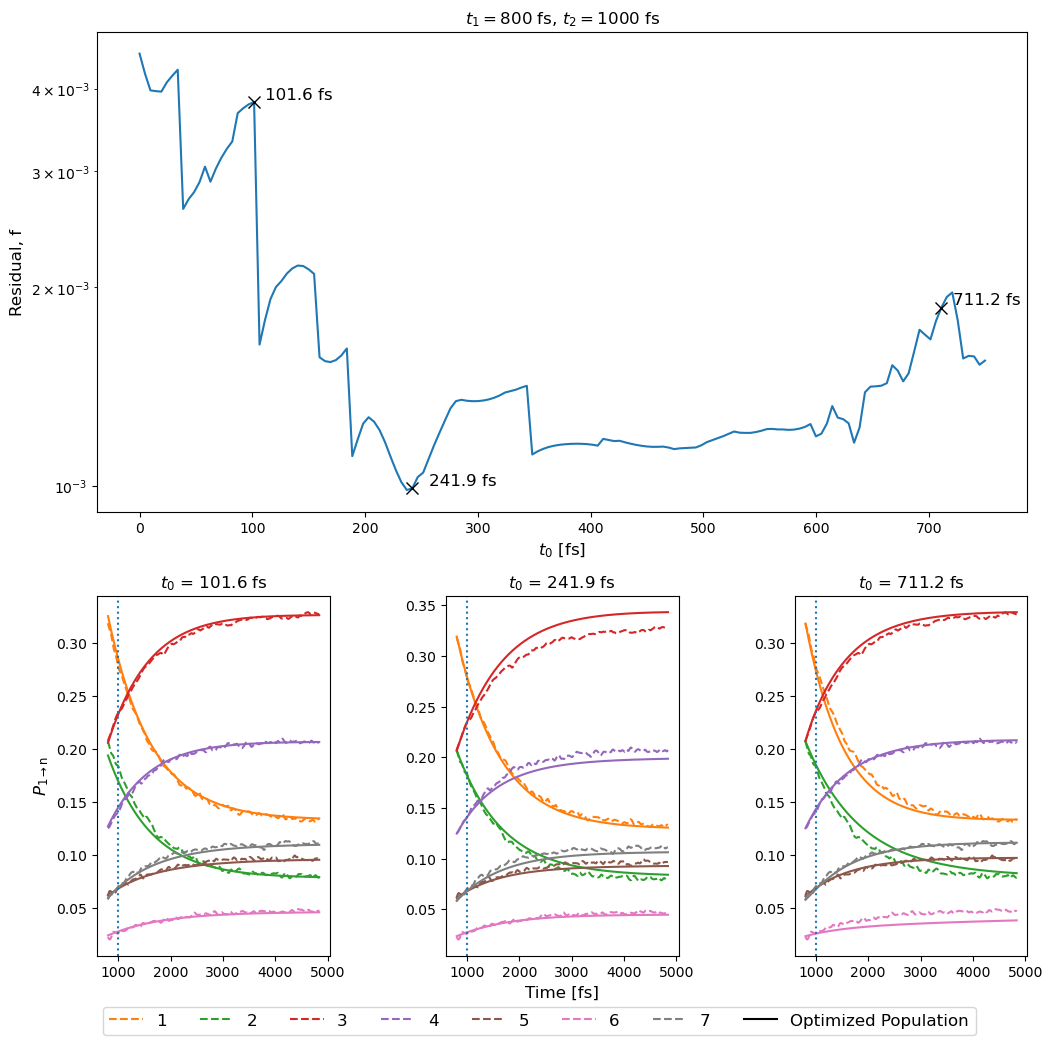

In [115]:
# Error over only the fitting window:
site_data = np.loadtxt(site_data_path)

#Error over 1000
site_residual_data = np.loadtxt("/u/dem/kebl6911/Part-II/MASH_optimization/t_1_2_Testing/800_1000_resid.dat")
site_data = site_data[site_data[:,0] <= 5000]
site_data = site_data[site_data[:,0]>=800]
column_names = ["Time"]
for i in range(1,8):
    column_names.append(str(i))
# Create a 2x1 grid of subplots
fig = plt.figure(constrained_layout=True,figsize=(12, 12))  # Adjust the figure size as needed
gs = gridspec.GridSpec(2, 1, height_ratios=[4, 3])

# Top plot: Square plot
ax0 = plt.subplot(gs[0])
ax0.semilogy(site_residual_data[:,0],site_residual_data[:,1])
ax0.set_title(r'$t_1 = 800$ fs, $t_2 = 1000$ fs')
ax0.set_ylabel('Residual, f')
ax0.set_xlabel(r'$t_0$ [fs]')

ax0.semilogy(site_residual_data[21,0], site_residual_data[21,1], 'x', markersize=8, color = 'black')
ax0.text(site_residual_data[21,0]+10, site_residual_data[21,1], '101.6 fs', fontsize=12, ha='left', va='bottom', color='black')

ax0.semilogy(site_residual_data[50,0], site_residual_data[50,1], 'x', markersize=8, color = 'black')
ax0.text(site_residual_data[50,0]+15, site_residual_data[50,1], '241.9 fs', fontsize=12, ha='left', va='bottom', color='black')

ax0.semilogy(site_residual_data[147,0], site_residual_data[147,1], 'x', markersize=8, color = 'black')
ax0.text(site_residual_data[147,0]+10, site_residual_data[147,1], '711.2 fs', fontsize=12, ha='left', va='bottom', color='black')

# # Bottom row: Three horizontal subplots
gs_sub1 = gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=gs[1], wspace=0.5)
# gs_sub2 = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[2], wspace=0.3)

ax1 = plt.Subplot(fig, gs_sub1[0])
ax2 = plt.Subplot(fig, gs_sub1[1])
ax3 = plt.Subplot(fig, gs_sub1[2])
#x4 = plt.Subplot(fig, gs_sub1[3])

fig.add_subplot(ax1)
fig.add_subplot(ax2)
fig.add_subplot(ax3)
#fig.add_subplot(ax4)
# ax1.axvline(x=site_residual_data[21,0], linestyle=":")
# ax2.axvline(x=site_residual_data[43,0], linestyle=":")
# ax3.axvline(x=site_residual_data[83,0], linestyle=":")
data_102 = np.loadtxt("/u/dem/kebl6911/Part-II/MASH_optimization/t_1_2_Testing/t1_800_t2_1000/101.59317448676096_22.dat")
for i, column_name in enumerate(column_names[1:], start=1):
    c = "C%i"%i
    ax1.plot(site_data[:,0], site_data[:,i],"--", label=column_name, color=c)
    ax1.plot(data_102[:,0],data_102[:,i], "-",color=c)

ax1.set_title(r'$t_0$ = 101.6 fs')
ax1.axvline(x=1000, linestyle = ":")

data_208 = np.loadtxt("/u/dem/kebl6911/Part-II/MASH_optimization/t_1_2_Testing/t1_800_t2_1000/241.88851068276415_51.dat")
for i, column_name in enumerate(column_names[1:], start=1):
    c = "C%i"%i
    ax2.plot(site_data[:,0], site_data[:,i],"--", label=column_name, color=c)
    ax2.plot(data_208[:,0],data_208[:,i], "-",color=c)

ax2.set_xlabel("Time [fs]")
ax2.set_title(r'$t_0$ = 241.9 fs')
ax2.axvline(x=1000, linestyle = ":")

data_402 = np.loadtxt("/u/dem/kebl6911/Part-II/MASH_optimization/t_1_2_Testing/t1_800_t2_1000/711.1522214073267_148.dat")
for i, column_name in enumerate(column_names[1:], start=1):
    c = "C%i"%i
    ax3.plot(site_data[:,0], site_data[:,i],"--", label=column_name, color=c)
    ax3.plot(data_402[:,0],data_402[:,i], "-",color=c)

ax3.set_title(r'$t_0$ = 711.2 fs')
ax3.axvline(x=1000, linestyle = ":")

# data_402 = np.loadtxt("/u/dem/kebl6911/Part-II/MASH_optimization/Optimize_p_init_final_report/new_site1/720.8277618346372_150.dat")
# for i, column_name in enumerate(column_names[1:], start=1):
#     c = "C%i"%i
#     ax4.plot(site_data[:,0], site_data[:,i],"--", label=column_name, color=c)
#     ax4.plot(data_402[:,0],data_402[:,i], "-",color=c)

# ax4.set_title('720.8 fs')
# ax4.legend(bbox_to_anchor=(1.2, 1), borderaxespad=0)

ax1.set_ylabel(r'$P_{\mathrm{1\rightarrow n}}$')
custom_legend_entry = Line2D([0], [0], linestyle=':', label='Dotted Lines', color='black')
# Define custom legend entries for dotted lines
dotted_legend_entry = Line2D([0], [0], linestyle='-', label='Optimized Population', color="black")

# Add the custom legend entries to the legend
legend_handles, legend_labels = ax3.get_legend_handles_labels()
legend_handles.append(dotted_legend_entry)
legend_labels.append('Optimized Population')
#ax4.legend(legend_handles, legend_labels, bbox_to_anchor=(1, 1), borderaxespad=0)  # Adjust the values as needed

# Adjust spacing between subplots
legend_handles, legend_labels = ax3.get_legend_handles_labels()
legend_handles.append(dotted_legend_entry)
legend_labels.append('Optimized Population')
ax3.legend(legend_handles, legend_labels, loc='lower center', bbox_to_anchor=(-1.1, -0.22), borderaxespad=0, ncol=8)  # Adjust the values as needed


plt.show()

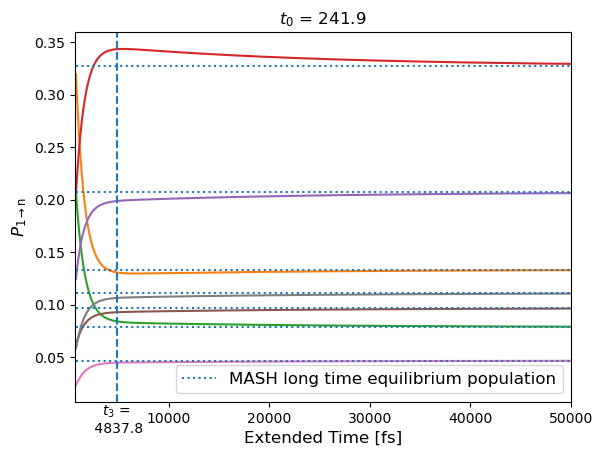

In [125]:
data = np.loadtxt("/u/dem/kebl6911/Part-II/MASH_optimization/t_1_2_Testing/t1_800_t2_1000_long/241.88851068276415_51.dat")
for i, column_name in enumerate(column_names[1:], start=1):
    c = "C%i"%i
    plt.plot(data[:,0],data[:,i], "-",color=c, label = f"{i}")
site_data_eq = site_data[-1][1:8]
for i in range(len(site_data_eq)):
    plt.hlines(xmin=data[:, 0].min(), xmax=data[:, 0].max(),y=site_data_eq[i], linestyle=":")

dotted_legend_entry = Line2D([0], [0], linestyle=':', label='Optimized Population')
legend_handles = plt.gca().get_lines() 
legend_handles = [dotted_legend_entry]  # Create a list of legend handles
legend_labels = ['MASH long time equilibrium population']  # Create a list of legend labels

# Use the legend function to create the legend
plt.legend(legend_handles, legend_labels)

plt.ylabel(r'$P_{\mathrm{1\rightarrow n}}$')
plt.xlabel("Extended Time [fs]")
plt.xlim(700,50000)

# Add a vertical line at a specific x-coordinate
vertical_line_x = 4.837770213655283442e+03
plt.axvline(x=vertical_line_x, linestyle="--", label=f"$t_0$")

# Label the vertical line using plt.text()
plt.text(vertical_line_x, -0.025, f"$t_3$ = \n 4837.8", verticalalignment='bottom', horizontalalignment='center')

plt.title(f"$t_0$ = 241.9")
plt.show()

# T1 = 800 fs, t2 = 1300

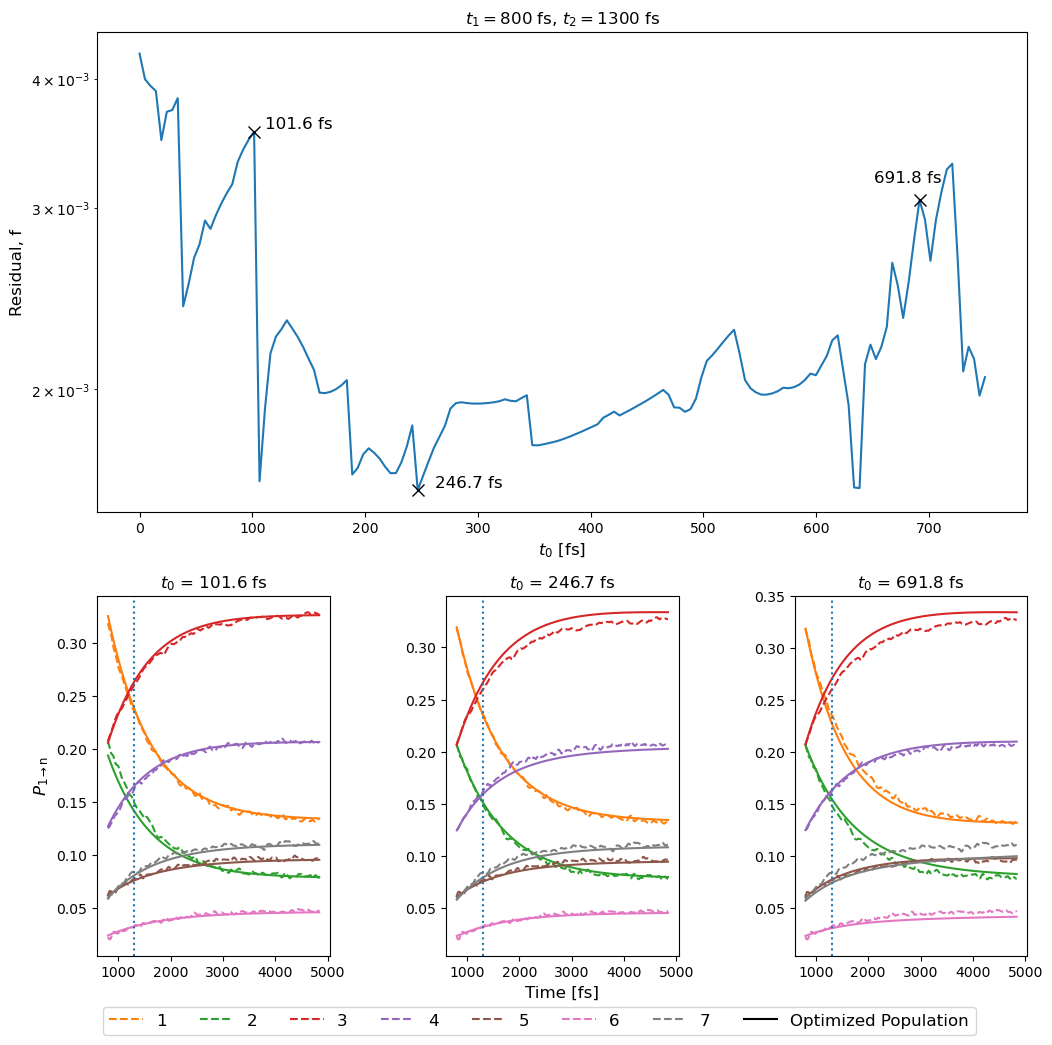

In [136]:
# Error over only the fitting window:
site_data = np.loadtxt(site_data_path)

#Error over 1000
site_residual_data = np.loadtxt("/u/dem/kebl6911/Part-II/MASH_optimization/t_1_2_Testing/800_1300_resid.dat")
site_data = site_data[site_data[:,0] <= 5000]
site_data = site_data[site_data[:,0]>=800]
column_names = ["Time"]
for i in range(1,8):
    column_names.append(str(i))
# Create a 2x1 grid of subplots
fig = plt.figure(constrained_layout=True,figsize=(12, 12))  # Adjust the figure size as needed
gs = gridspec.GridSpec(2, 1, height_ratios=[4, 3])

# Top plot: Square plot
ax0 = plt.subplot(gs[0])
ax0.semilogy(site_residual_data[:,0],site_residual_data[:,1])
ax0.set_title(r'$t_1 = 800$ fs, $t_2 = 1300$ fs')
ax0.set_ylabel('Residual, f')
ax0.set_xlabel(r'$t_0$ [fs]')

ax0.semilogy(site_residual_data[21,0], site_residual_data[21,1], 'x', markersize=8, color = 'black')
ax0.text(site_residual_data[21,0]+10, site_residual_data[21,1], '101.6 fs', fontsize=12, ha='left', va='bottom', color='black')

ax0.semilogy(site_residual_data[51,0], site_residual_data[51,1], 'x', markersize=8, color = 'black')
ax0.text(site_residual_data[51,0]+15, site_residual_data[51,1], '246.7 fs', fontsize=12, ha='left', va='bottom', color='black')

ax0.semilogy(site_residual_data[143,0], site_residual_data[143,1], 'x', markersize=8, color = 'black')
ax0.text(site_residual_data[143,0]-40, site_residual_data[143,1]+0.0001, '691.8 fs', fontsize=12, ha='left', va='bottom', color='black')

# # Bottom row: Three horizontal subplots
gs_sub1 = gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=gs[1], wspace=0.5)
# gs_sub2 = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[2], wspace=0.3)

ax1 = plt.Subplot(fig, gs_sub1[0])
ax2 = plt.Subplot(fig, gs_sub1[1])
ax3 = plt.Subplot(fig, gs_sub1[2])
#x4 = plt.Subplot(fig, gs_sub1[3])

fig.add_subplot(ax1)
fig.add_subplot(ax2)
fig.add_subplot(ax3)
#fig.add_subplot(ax4)
# ax1.axvline(x=site_residual_data[21,0], linestyle=":")
# ax2.axvline(x=site_residual_data[43,0], linestyle=":")
# ax3.axvline(x=site_residual_data[83,0], linestyle=":")
data_102 = np.loadtxt("/u/dem/kebl6911/Part-II/MASH_optimization/t_1_2_Testing/t1_800_t2_1300/101.59317448676096_22.dat")
for i, column_name in enumerate(column_names[1:], start=1):
    c = "C%i"%i
    ax1.plot(site_data[:,0], site_data[:,i],"--", label=column_name, color=c)
    ax1.plot(data_102[:,0],data_102[:,i], "-",color=c)

ax1.set_title(r'$t_0$ = 101.6 fs')
ax1.axvline(x=1300, linestyle = ":")

data_208 = np.loadtxt("/u/dem/kebl6911/Part-II/MASH_optimization/t_1_2_Testing/t1_800_t2_1300/246.72628089641944_52.dat")
for i, column_name in enumerate(column_names[1:], start=1):
    c = "C%i"%i
    ax2.plot(site_data[:,0], site_data[:,i],"--", label=column_name, color=c)
    ax2.plot(data_208[:,0],data_208[:,i], "-",color=c)

ax2.set_xlabel("Time [fs]")
ax2.set_title(r'$t_0$ = 246.7 fs')
ax2.axvline(x=1300, linestyle = ":")

data_402 = np.loadtxt("/u/dem/kebl6911/Part-II/MASH_optimization/t_1_2_Testing/t1_800_t2_1300/691.8011405527055_144.dat")
for i, column_name in enumerate(column_names[1:], start=1):
    c = "C%i"%i
    ax3.plot(site_data[:,0], site_data[:,i],"--", label=column_name, color=c)
    ax3.plot(data_402[:,0],data_402[:,i], "-",color=c)

ax3.set_title(r'$t_0$ = 691.8 fs')
ax3.axvline(x=1300, linestyle = ":")

# data_402 = np.loadtxt("/u/dem/kebl6911/Part-II/MASH_optimization/Optimize_p_init_final_report/new_site1/720.8277618346372_150.dat")
# for i, column_name in enumerate(column_names[1:], start=1):
#     c = "C%i"%i
#     ax4.plot(site_data[:,0], site_data[:,i],"--", label=column_name, color=c)
#     ax4.plot(data_402[:,0],data_402[:,i], "-",color=c)

# ax4.set_title('720.8 fs')
# ax4.legend(bbox_to_anchor=(1.2, 1), borderaxespad=0)

ax1.set_ylabel(r'$P_{\mathrm{1\rightarrow n}}$')
custom_legend_entry = Line2D([0], [0], linestyle=':', label='Dotted Lines', color='black')
# Define custom legend entries for dotted lines
dotted_legend_entry = Line2D([0], [0], linestyle='-', label='Optimized Population', color="black")

# Add the custom legend entries to the legend
legend_handles, legend_labels = ax3.get_legend_handles_labels()
legend_handles.append(dotted_legend_entry)
legend_labels.append('Optimized Population')
#ax4.legend(legend_handles, legend_labels, bbox_to_anchor=(1, 1), borderaxespad=0)  # Adjust the values as needed

# Adjust spacing between subplots
legend_handles, legend_labels = ax3.get_legend_handles_labels()
legend_handles.append(dotted_legend_entry)
legend_labels.append('Optimized Population')
ax3.legend(legend_handles, legend_labels, loc='lower center', bbox_to_anchor=(-1.1, -0.22), borderaxespad=0, ncol=8)  # Adjust the values as needed


plt.show()

#t0 = 0 fs, t1 = changes

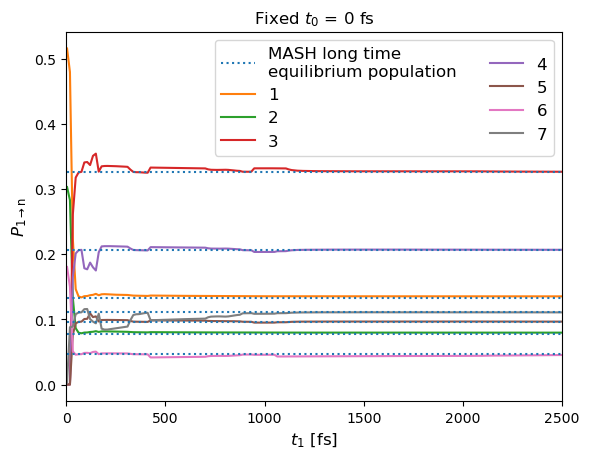

In [139]:
data = np.loadtxt("/u/dem/kebl6911/Part-II/MASH_optimization/t_1_2_Testing/t1_slide_T0_0.dat")
for i in range(1,8):
    plt.plot(data[:,0],data[:,i], "-", label = i, color="C%i"%i)

site_data_eq = site_data[-1][1:8]
for i in range(len(site_data_eq)):
    plt.hlines(xmin=data[:, 0].min(), xmax=data[:, 0].max(),y=site_data_eq[i], linestyle=":")
dotted_legend_entry = Line2D([0], [0], linestyle=':', label='Optimized Population')
legend_handles = plt.gca().get_lines() 
legend_handles = [dotted_legend_entry]  # Create a list of legend handles
legend_labels = ['MASH long time equilibrium population']  # Create a list of legend labels

# Use the legend function to create the legend
# plt.legend(legend_handles, legend_labels)
plt.legend(legend_handles, [line.get_label() for line in legend_handles])

# Add labels for each line below the dotted line in the seven columns

column_legend_entries = [Line2D([0], [0], linestyle='-', label=f'{i}', color="C%i"%i) for i in range(1, 8)]

# Create a custom legend entry for the optimized population
dotted_legend_entry = Line2D([0], [0], linestyle=':', label='MASH long time \nequilibrium population')

# Combine all legend handles and labels
legend_handles = [dotted_legend_entry] + column_legend_entries
legend_labels = [line.get_label() for line in legend_handles]

# Use the legend function to create the legend
plt.legend(legend_handles, legend_labels, loc='upper right', ncol=2)
plt.ylabel(r'$P_{\mathrm{1\rightarrow n}}$')
plt.xlabel(f"$t_1$ [fs]")
plt.xlim(0,2500)
plt.title(f"Fixed $t_0$ = 0 fs")
plt.show()



t1=1300, t2=1500

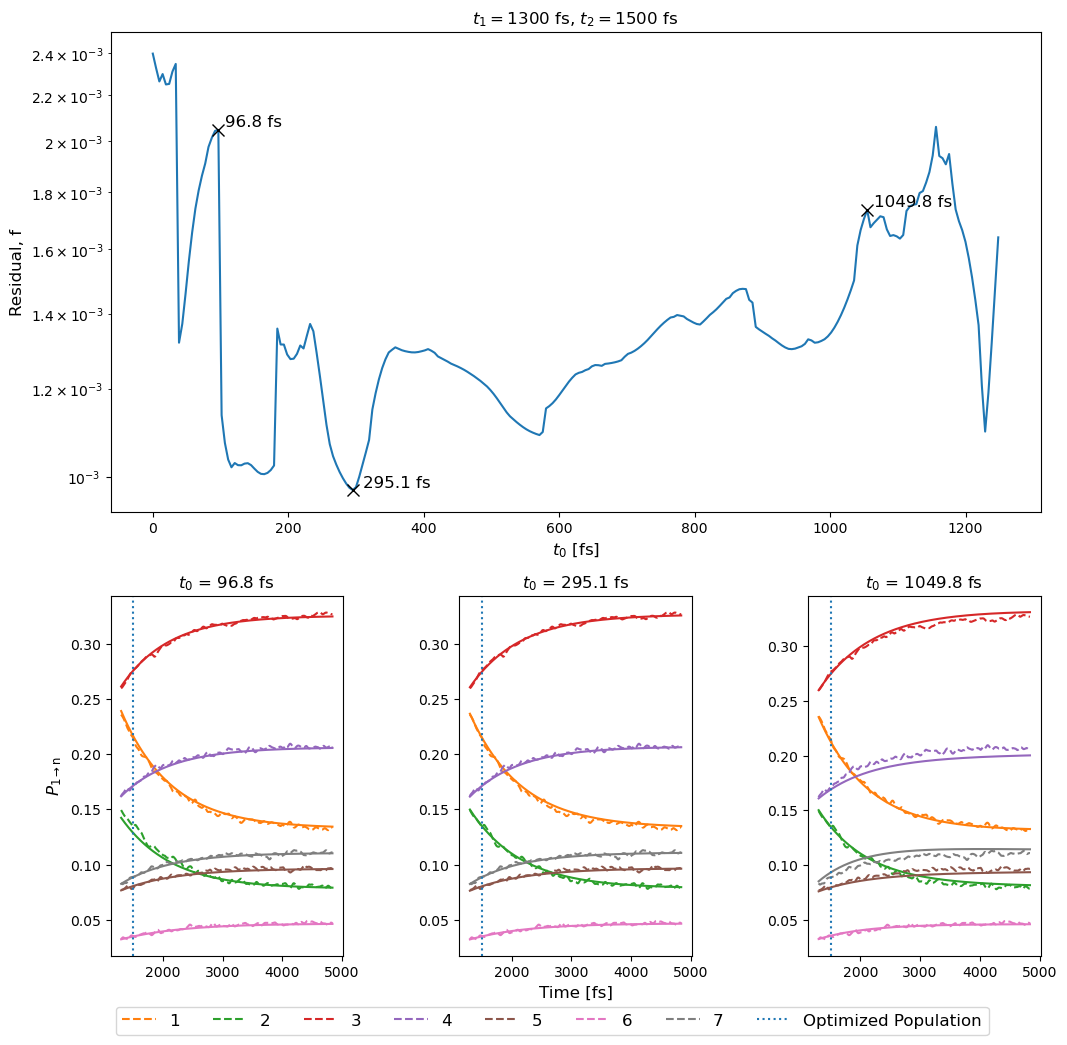

In [142]:
# Error over only the fitting window:
site_data = np.loadtxt(site_data_path)

#Error over 1000
site_residual_data = np.loadtxt("/u/dem/kebl6911/Part-II/MASH_optimization/t_1_2_Testing/1300_1500_resid.dat")
#site_data = site_data[site_data[:,0] <= 1000]
# site_data = site_data[site_data[:,0]>=800]
site_data = site_data[site_data[:,0] <= 5000]
site_data = site_data[site_data[:,0]>=1300]
column_names = ["Time"]
for i in range(1,8):
    column_names.append(str(i))
# Create a 2x1 grid of subplots
fig = plt.figure(constrained_layout=True,figsize=(12, 12))  # Adjust the figure size as needed
gs = gridspec.GridSpec(2, 1, height_ratios=[4, 3])

# Top plot: Square plot
ax0 = plt.subplot(gs[0])
ax0.semilogy(site_residual_data[:,0],site_residual_data[:,1])
ax0.set_title(r'$t_1 = 1300$ fs, $t_2 = 1500$ fs')
ax0.set_ylabel('Residual, f')
ax0.set_xlabel(r'$t_0$ [fs]')

ax0.semilogy(site_residual_data[20,0], site_residual_data[20,1], 'x', markersize=8, color = 'black')
ax0.text(site_residual_data[20,0]+10, site_residual_data[20,1], '96.8 fs', fontsize=12, ha='left', va='bottom', color='black')

ax0.semilogy(site_residual_data[61,0], site_residual_data[61,1], 'x', markersize=8, color = 'black')
ax0.text(site_residual_data[61,0]+15, site_residual_data[61,1], '295.1 fs', fontsize=12, ha='left', va='bottom', color='black')

ax0.semilogy(site_residual_data[218,0], site_residual_data[218,1], 'x', markersize=8, color = 'black')
ax0.text(site_residual_data[218,0]+10, site_residual_data[218,1], '1049.8 fs', fontsize=12, ha='left', va='bottom', color='black')

# # Bottom row: Three horizontal subplots
gs_sub1 = gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=gs[1], wspace=0.5)
# gs_sub2 = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[2], wspace=0.3)

ax1 = plt.Subplot(fig, gs_sub1[0])
ax2 = plt.Subplot(fig, gs_sub1[1])
ax3 = plt.Subplot(fig, gs_sub1[2])
#x4 = plt.Subplot(fig, gs_sub1[3])

fig.add_subplot(ax1)
fig.add_subplot(ax2)
fig.add_subplot(ax3)
#fig.add_subplot(ax4)
# ax1.axvline(x=site_residual_data[21,0], linestyle=":")
# ax2.axvline(x=site_residual_data[43,0], linestyle=":")
# ax3.axvline(x=site_residual_data[83,0], linestyle=":")
data_102 = np.loadtxt("/u/dem/kebl6911/Part-II/MASH_optimization/t_1_2_Testing/t1_1300_t2_1700/96.75540427310567_21.dat")
for i, column_name in enumerate(column_names[1:], start=1):
    c = "C%i"%i
    ax1.plot(site_data[:,0], site_data[:,i],"--", label=column_name, color=c)
    ax1.plot(data_102[:,0],data_102[:,i], "-",color=c)

ax1.set_title(r'$t_0$ = 96.8 fs')
ax1.axvline(x=1500, linestyle = ":")
data_208 = np.loadtxt("/u/dem/kebl6911/Part-II/MASH_optimization/t_1_2_Testing/t1_1300_t2_1700/295.1039830329723_62.dat")
for i, column_name in enumerate(column_names[1:], start=1):
    c = "C%i"%i
    ax2.plot(site_data[:,0], site_data[:,i],"--", label=column_name, color=c)
    ax2.plot(data_208[:,0],data_208[:,i], "-",color=c)

ax2.set_xlabel("Time [fs]")
ax2.set_title(r'$t_0$ = 295.1 fs')
ax2.axvline(x=1500, linestyle = ":")
data_402 = np.loadtxt("/u/dem/kebl6911/Part-II/MASH_optimization/t_1_2_Testing/t1_1300_t2_1700/1049.7961363631964_218.dat")
for i, column_name in enumerate(column_names[1:], start=1):
    c = "C%i"%i
    ax3.plot(site_data[:,0], site_data[:,i],"--", label=column_name, color=c)
    ax3.plot(data_402[:,0],data_402[:,i], "-",color=c)

ax3.set_title(r'$t_0$ = 1049.8 fs')
ax3.axvline(x=1500, linestyle = ":")
# data_402 = np.loadtxt("/u/dem/kebl6911/Part-II/MASH_optimization/Optimize_p_init_final_report/new_site1/720.8277618346372_150.dat")
# for i, column_name in enumerate(column_names[1:], start=1):
#     c = "C%i"%i
#     ax4.plot(site_data[:,0], site_data[:,i],"--", label=column_name, color=c)
#     ax4.plot(data_402[:,0],data_402[:,i], "-",color=c)

# ax4.set_title('720.8 fs')
# ax4.legend(bbox_to_anchor=(1.2, 1), borderaxespad=0)

ax1.set_ylabel(r'$P_{\mathrm{1\rightarrow n}}$')
custom_legend_entry = Line2D([0], [0], linestyle=':', label='Dotted Lines', color='black')
# Define custom legend entries for dotted lines
dotted_legend_entry = Line2D([0], [0], linestyle=':', label='MASH long time \nequilibrium population')

# Add the custom legend entries to the legend
legend_handles, legend_labels = ax3.get_legend_handles_labels()
legend_handles.append(dotted_legend_entry)
legend_labels.append('Optimized Population')
#ax4.legend(legend_handles, legend_labels, bbox_to_anchor=(1, 1), borderaxespad=0)  # Adjust the values as needed

# Adjust spacing between subplots
legend_handles, legend_labels = ax3.get_legend_handles_labels()
legend_handles.append(dotted_legend_entry)
legend_labels.append('Optimized Population')
ax3.legend(legend_handles, legend_labels, loc='lower center', bbox_to_anchor=(-1.1, -0.22), borderaxespad=0, ncol=8)  # Adjust the values as needed


plt.show()


Fixed t_0=0fs, weighted = 5

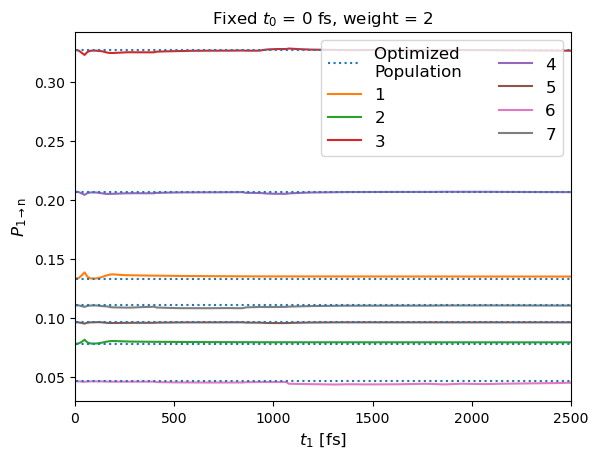

In [101]:
data = np.loadtxt("/u/dem/kebl6911/Part-II/MASH_optimization/t_1_2_Testing/t1_slide_weight.dat")
for i in range(1,8):
    plt.plot(data[:,0],data[:,i], "-", label = i, color="C%i"%i)

site_data_eq = site_data[-1][1:8]
for i in range(len(site_data_eq)):
    plt.hlines(xmin=data[:, 0].min(), xmax=data[:, 0].max(),y=site_data_eq[i], linestyle=":")
dotted_legend_entry = Line2D([0], [0], linestyle=':', label='Optimized Population')
legend_handles = plt.gca().get_lines() 
legend_handles = [dotted_legend_entry]  # Create a list of legend handles
legend_labels = ['MASH long time equilibrium population']  # Create a list of legend labels

# Use the legend function to create the legend
# plt.legend(legend_handles, legend_labels)
plt.legend(legend_handles, [line.get_label() for line in legend_handles])

# Add labels for each line below the dotted line in the seven columns

column_legend_entries = [Line2D([0], [0], linestyle='-', label=f'{i}', color="C%i"%i) for i in range(1, 8)]

# Create a custom legend entry for the optimized population
dotted_legend_entry = Line2D([0], [0], linestyle=':', label='Optimized \nPopulation')

# Combine all legend handles and labels
legend_handles = [dotted_legend_entry] + column_legend_entries
legend_labels = [line.get_label() for line in legend_handles]

# Use the legend function to create the legend
plt.legend(legend_handles, legend_labels, loc='upper right', ncol=2)
plt.ylabel(r'$P_{\mathrm{1\rightarrow n}}$')
plt.xlabel(f"$t_1$ [fs]")
plt.xlim(0,2500)
plt.title(f"Fixed $t_0$ = 0 fs, weight = 2")
plt.show()


/u/dem/kebl6911/anaconda3/envs/project1/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


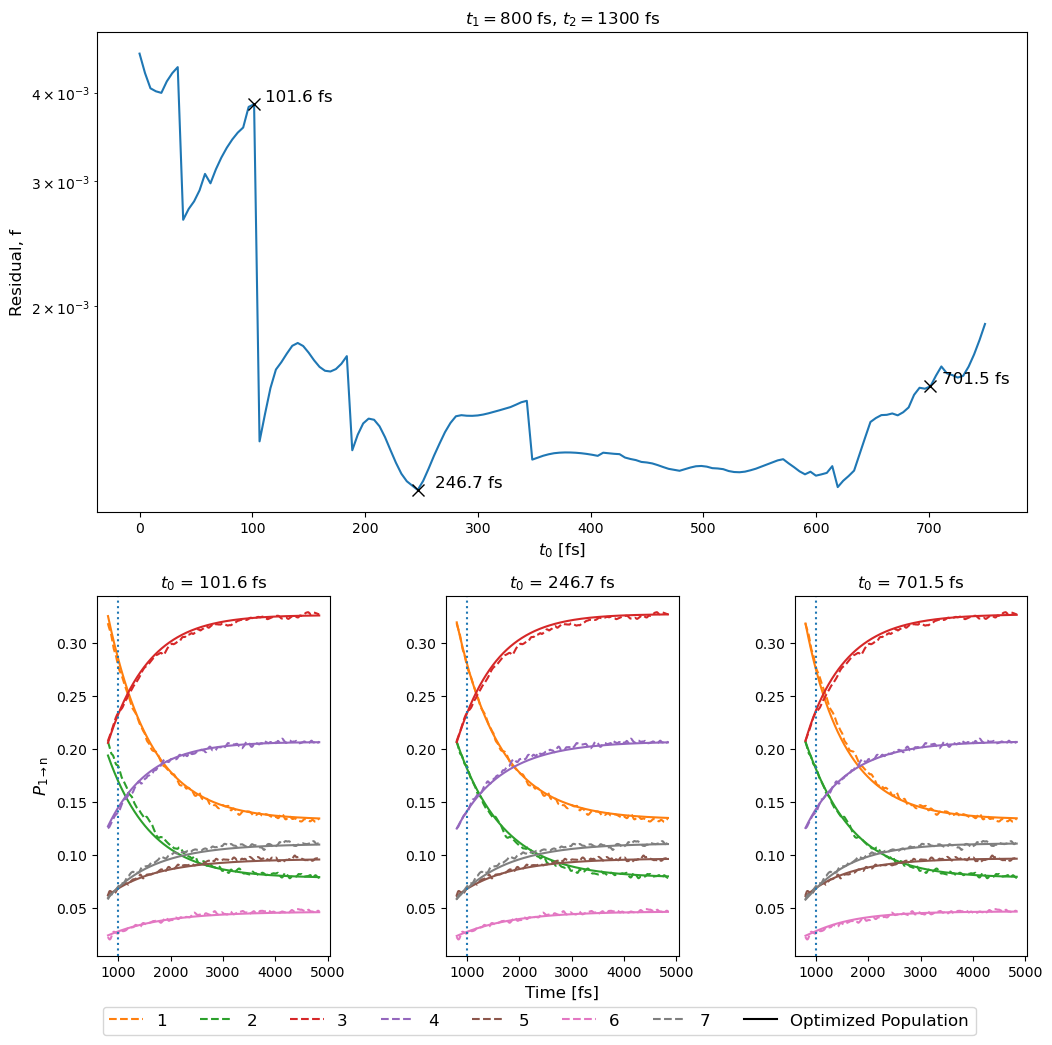

In [143]:
# Error over only the fitting window:
site_data = np.loadtxt(site_data_path)

#Error over 1000
# site_residual_data = np.loadtxt("/u/dem/kebl6911/Part-II/MASH_optimization/t_1_2_Testing/w2_800_1000_resid1.dat")
site_residual_data = np.loadtxt("/u/dem/kebl6911/Part-II/MASH_optimization/t_1_2_Testing/w2_800_1000_resid2.dat")
#site_data = site_data[site_data[:,0] <= 1000]
# site_data = site_data[site_data[:,0]>=800]
site_data = site_data[site_data[:,0] <= 5000]
site_data = site_data[site_data[:,0]>=800]
column_names = ["Time"]
for i in range(1,8):
    column_names.append(str(i))
# Create a 2x1 grid of subplots
fig = plt.figure(constrained_layout=True,figsize=(12, 12))  # Adjust the figure size as needed
gs = gridspec.GridSpec(2, 1, height_ratios=[4, 3])

# Top plot: Square plot
ax0 = plt.subplot(gs[0])
ax0.semilogy(site_residual_data_2[:,0],site_residual_data_2[:,1])
ax0.set_title(r'$t_1 = 800$ fs, $t_2 = 1000$ fs, weight = 2')
ax0.set_ylabel('Residual, f')
ax0.set_xlabel(r'$t_0$ [fs]')

ax0.semilogy(site_residual_data[21,0], site_residual_data[21,1], 'x', markersize=8, color = 'black')
ax0.text(site_residual_data[21,0]+10, site_residual_data[21,1], '101.6 fs', fontsize=12, ha='left', va='bottom', color='black')

ax0.semilogy(site_residual_data[51,0], site_residual_data[51,1], 'x', markersize=8, color = 'black')
ax0.text(site_residual_data[51,0]+15, site_residual_data[51,1], '246.7 fs', fontsize=12, ha='left', va='bottom', color='black')

ax0.semilogy(site_residual_data[145,0], site_residual_data[145,1], 'x', markersize=8, color = 'black')
ax0.text(site_residual_data[145,0]+10, site_residual_data[145,1], '701.5 fs', fontsize=12, ha='left', va='bottom', color='black')

# # Bottom row: Three horizontal subplots
gs_sub1 = gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=gs[1], wspace=0.5)
# gs_sub2 = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[2], wspace=0.3)

ax1 = plt.Subplot(fig, gs_sub1[0])
ax2 = plt.Subplot(fig, gs_sub1[1])
ax3 = plt.Subplot(fig, gs_sub1[2])
#x4 = plt.Subplot(fig, gs_sub1[3])

fig.add_subplot(ax1)
fig.add_subplot(ax2)
fig.add_subplot(ax3)
#fig.add_subplot(ax4)
# ax1.axvline(x=site_residual_data[21,0], linestyle=":")
# ax2.axvline(x=site_residual_data[43,0], linestyle=":")
# ax3.axvline(x=site_residual_data[83,0], linestyle=":")
data_102 = np.loadtxt("/u/dem/kebl6911/Part-II/MASH_optimization/t_1_2_Testing/w2_t1_800_t2_1000/101.59317448676096_22.dat")
for i, column_name in enumerate(column_names[1:], start=1):
    c = "C%i"%i
    ax1.plot(site_data[:,0], site_data[:,i],"--", label=column_name, color=c)
    ax1.plot(data_102[:,0],data_102[:,i], "-",color=c)

ax1.set_title(r'$t_0$ = 101.6 fs')
ax1.axvline(x=1000, linestyle = ":")

data_208 = np.loadtxt("/u/dem/kebl6911/Part-II/MASH_optimization/t_1_2_Testing/w2_t1_800_t2_1000/246.72628089641944_52.dat")
for i, column_name in enumerate(column_names[1:], start=1):
    c = "C%i"%i
    ax2.plot(site_data[:,0], site_data[:,i],"--", label=column_name, color=c)
    ax2.plot(data_208[:,0],data_208[:,i], "-",color=c)

ax2.set_xlabel("Time [fs]")
ax2.set_title(r'$t_0$ = 246.7 fs')
ax2.axvline(x=1000, linestyle = ":")

data_402 = np.loadtxt("/u/dem/kebl6911/Part-II/MASH_optimization/t_1_2_Testing/w2_t1_800_t2_1000/701.4766809800161_146.dat")
for i, column_name in enumerate(column_names[1:], start=1):
    c = "C%i"%i
    ax3.plot(site_data[:,0], site_data[:,i],"--", label=column_name, color=c)
    ax3.plot(data_402[:,0],data_402[:,i], "-",color=c)

ax3.set_title(r'$t_0$ = 701.5 fs')
ax3.axvline(x=1000, linestyle = ":")

ax1.set_ylabel(r'$P_{\mathrm{1\rightarrow n}}$')
custom_legend_entry = Line2D([0], [0], linestyle=':', label='Dotted Lines', color='black')
# Define custom legend entries for dotted lines
dotted_legend_entry = Line2D([0], [0], linestyle='-', label='Optimized Population', color="black")

# Add the custom legend entries to the legend
legend_handles, legend_labels = ax3.get_legend_handles_labels()
legend_handles.append(dotted_legend_entry)
legend_labels.append('Optimized Population')
#ax4.legend(legend_handles, legend_labels, bbox_to_anchor=(1, 1), borderaxespad=0)  # Adjust the values as needed

# Adjust spacing between subplots
legend_handles, legend_labels = ax3.get_legend_handles_labels()
legend_handles.append(dotted_legend_entry)
legend_labels.append('Optimized Population')
ax3.legend(legend_handles, legend_labels, loc='lower center', bbox_to_anchor=(-1.1, -0.22), borderaxespad=0, ncol=8)  # Adjust the values as needed


plt.show()
